## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model , datasets
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = datasets.load_boston()

target = pd.DataFrame(data = df['target'])
df = pd.DataFrame(columns=df['feature_names'] , data = df['data'])

## Linear Regression

In [3]:
train_x , test_x , train_y , test_y = train_test_split(df , target , test_size = 0.2 )

reg = linear_model.LinearRegression()
reg.fit(train_x , train_y)
pred_y = reg.predict(test_x)
print(f'Coefficients : {reg.coef_}\n')
print(f'Mean_squared_error : {mean_squared_error(test_y,pred_y)}\n')

Coefficients : [[-9.76771465e-02  5.05497184e-02  3.79681239e-02  4.03469583e+00
  -1.49702909e+01  4.05662630e+00 -6.60421781e-03 -1.52350177e+00
   2.88599057e-01 -1.09258015e-02 -8.98381253e-01  1.08198803e-02
  -5.45454326e-01]]

Mean_squared_error : 18.31635525231109



## Lasso

In [4]:
train_x , test_x , train_y , test_y = train_test_split(df , target , test_size = 0.2 )

alpha = [1e-20 , 1e-15, 1e-10 , 1e-5 , 1e-1, 0 , 1 , 2 , 5, 10]
columns = list(df.columns)
coef = [] ; mse = []

for a in alpha:
    lasso = linear_model.Lasso(alpha=a).fit(train_x , train_y)
    pred_y = lasso.predict(test_x)
    coef.append(lasso.coef_)
    mse.append(mean_squared_error(test_y,pred_y))
    
result = pd.DataFrame(coef , columns=columns , index= alpha)
result['MSE'] = mse
result

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MSE
1.000000e-20,-0.108646,0.041501,0.040679,1.919791,-15.228687,4.385934,0.010913,-1.271839,0.286758,-0.012724,-0.910779,0.011181,-0.537250,28.753587
1.000000e-15,-0.108646,0.041501,0.040679,1.919791,-15.228687,4.385934,0.010913,-1.271839,0.286758,-0.012724,-0.910779,0.011181,-0.537250,28.753587
1.000000e-10,-0.108646,0.041501,0.040679,1.919791,-15.228687,4.385934,0.010913,-1.271839,0.286758,-0.012724,-0.910779,0.011181,-0.537250,28.753587
1.000000e-05,-0.108644,0.041501,0.040665,1.919638,-15.225261,4.385951,0.010911,-1.271782,0.286750,-0.012724,-0.910739,0.011181,-0.537256,28.753883
1.000000e-01,-0.101253,0.042712,-0.004428,0.311332,-0.000000,4.318013,0.001358,-0.981430,0.259291,-0.014476,-0.745403,0.011902,-0.577747,31.191125
0.000000e+00,-0.108646,0.041501,0.040679,1.919791,-15.228687,4.385934,0.010913,-1.271839,0.286758,-0.012724,-0.910779,0.011181,-0.537250,28.753587
1.000000e+00,-0.063622,0.041050,-0.000000,0.000000,-0.000000,1.511571,0.036486,-0.465813,0.250964,-0.014505,-0.690545,0.009267,-0.775184,31.760408
2.000000e+00,-0.022326,0.035365,-0.000000,0.000000,-0.000000,0.000000,0.059824,-0.000000,0.188057,-0.012600,-0.534796,0.007505,-0.878208,36.168098
5.000000e+00,-0.000000,0.039082,-0.000000,0.000000,0.000000,0.000000,0.045238,-0.000000,0.000000,-0.008181,-0.000000,0.006730,-0.805220,38.948991
1.000000e+01,-0.000000,0.024082,-0.000000,0.000000,0.000000,0.000000,0.007447,-0.000000,0.000000,-0.009697,-0.000000,0.008129,-0.609937,39.084225


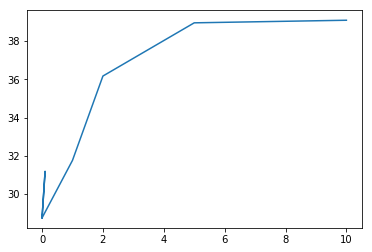

In [7]:
plt.plot(result['MSE'])

### Ridge

In [5]:
train_x , test_x , train_y , test_y = train_test_split(df , target , test_size = 0.2 )

alpha = [1e-20 , 1e-15, 1e-10 , 1e-5 , 1e-1, 0 , 1 , 2 , 5, 10]
columns = list(df.columns)
coef = pd.DataFrame() ; mse = []

for a in alpha:
    ridge = linear_model.Ridge(alpha=a).fit(train_x , train_y)
    pred_y = ridge.predict(test_x)
    para = pd.DataFrame(ridge.coef_)
    coef = pd.concat([coef , para])
    mse.append(mean_squared_error(test_y,pred_y))
    

coef.columns = columns
coef.index = alpha
coef['MSE'] = mse
coef

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MSE
1.000000e-20,-0.103443,0.053166,-0.050231,4.052064,-17.275981,3.472337,-0.000656,-1.577482,0.311594,-0.012012,-0.889521,0.007329,-0.527214,33.086772
1.000000e-15,-0.103443,0.053166,-0.050231,4.052064,-17.275981,3.472337,-0.000656,-1.577482,0.311594,-0.012012,-0.889521,0.007329,-0.527214,33.086772
1.000000e-10,-0.103443,0.053166,-0.050231,4.052064,-17.275981,3.472337,-0.000656,-1.577482,0.311594,-0.012012,-0.889521,0.007329,-0.527214,33.086772
1.000000e-05,-0.103442,0.053166,-0.050232,4.052063,-17.275840,3.472338,-0.000656,-1.577480,0.311594,-0.012012,-0.889520,0.007329,-0.527214,33.086774
1.000000e-01,-0.102878,0.053291,-0.055472,4.038108,-15.970283,3.481094,-0.001939,-1.558154,0.308190,-0.012101,-0.876362,0.007395,-0.528055,33.107046
0.000000e+00,-0.103443,0.053166,-0.050231,4.052064,-17.275981,3.472337,-0.000656,-1.577482,0.311594,-0.012012,-0.889521,0.007329,-0.527214,33.086772
1.000000e+00,-0.100166,0.053979,-0.080930,3.908506,-9.507007,3.512078,-0.008119,-1.462403,0.292104,-0.012585,-0.812760,0.007718,-0.533482,33.326100
2.000000e+00,-0.099044,0.054393,-0.091894,3.768056,-6.559905,3.508350,-0.010701,-1.418603,0.285824,-0.012860,-0.785865,0.007857,-0.537742,33.459344
5.000000e+00,-0.098148,0.055135,-0.101949,3.396208,-3.401367,3.447373,-0.012751,-1.370986,0.282132,-0.013305,-0.763054,0.007977,-0.547744,33.529056
1.000000e+01,-0.098128,0.055972,-0.104593,2.916756,-1.888330,3.318585,-0.012554,-1.346299,0.284940,-0.013741,-0.761025,0.007975,-0.561466,33.445882


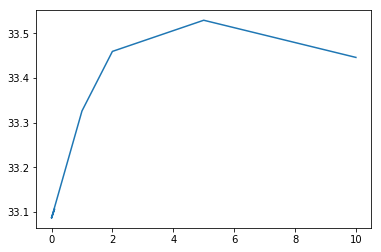

In [8]:
plt.plot(coef['MSE'])